In [1]:
import numpy as np
import copy
import pandas as pd
from skimage.feature import peak_local_max
import os
import copy

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'font.size': 16})
from matplotlib.ticker import FormatStrFormatter

In [4]:
def read_colMat(file):
    data_in = np.loadtxt(file, comments='#')
    # This presumes colMat having a fixed column structure. MAY CHANGE IN FUTURE!!!!
    N = np.array( [ int(x[0]) for x in data_in ] )
    lnPi = np.array( [ x[1] for x in data_in ] )
    energy = np.array( [ x[9]/x[8] for x in data_in] )
    energy2 = np.array( [ x[10]/x[8] for x in data_in ] )
    
    for line in open(src+"/"+MC_output):
        if 'beta' in line: beta = float(line.split()[-1])
        if 'lnz' in line: lnZ = float(line.split()[-1])
    
    return N, lnPi, energy, energy2, beta, lnZ

In [5]:
src = '/mnt/WS_PN107151/dsideriu/Research/Monte_Carlo/my_FEASST/MFI_Argon/MFI_Argon_WCA.test'
MC_output = 'colMat'
N, lnPi, energy, energy2, beta, lnZ0 = read_colMat(src+'/'+MC_output)
energy2 = energy2 - 2.*energy[0]*energy + energy[0]**2
energy = energy - energy[0]

In [6]:
def read_window_data(source,prefix):
    input_files = [ x for x in os.listdir(source) if (prefix in x and "rng" not in x and "bak" not in x) ]
    windows = len(input_files)

    for i in range(windows):
        file_in = source+ "/" + prefix+str(i)
        N_w, lnPi_w, energy_w, energy2_w = read_colMat(file_in)
        if i == 0:
            for line in open(file_in):
                if 'beta' in line: beta = float(line.split()[-1])
                if 'lnz' in line: lnZ = float(line.split()[-1])
            Nmin = 0
            Nmax = N_w[-1]
            lnPi_master = copy.copy(lnPi_w)
            energy_master = copy.copy(energy_w)
            energy2_master = copy.copy(energy2_w)
        else:
            reference = N_w[0]
            lnPi_w = lnPi_w + (lnPi_master[reference]-lnPi_w[0])
            lnPi_master = np.concatenate([lnPi_master,lnPi_w[1:]])
            #Simple splicing of the energy terms
            energy_master = np.concatenate([energy_master,energy_w[1:]])
            energy2_master = np.concatenate([energy2_master,energy2_w[1:]])
            Nmax = max(Nmax,N_w[-1])
    N_master = np.array(range(Nmin,Nmax+1))

    # Normalize
    lnPi_master = lnPi_master - max(lnPi_master)
    lnPi_master = lnPi_master - np.log(sum(np.exp(lnPi_master)))
    # Adjust Energy so that E(Nmin) = 0
    #energy2_master = energy2_master - 2.*energy_master[0]*energy_master + energy_master[0]**2
    #energy_master = energy_master - energy_master[0]

    return N_master, lnPi_master, energy_master, energy2_master

In [7]:
src = '/mnt/WS_PN107151/dsideriu/Research/Monte_Carlo/my_FEASST/MFI_Argon/MFI_Argon_WCA.test'
MC_output = "colMat_core"
N1, lnPi1, energy1, energy21, beta, lnZ0 = read_window_data(src,MC_output)
energy21 = energy21 - 2.*energy1[0]*energy1 + energy1[0]**2
energy1 = energy1 - energy1[0]

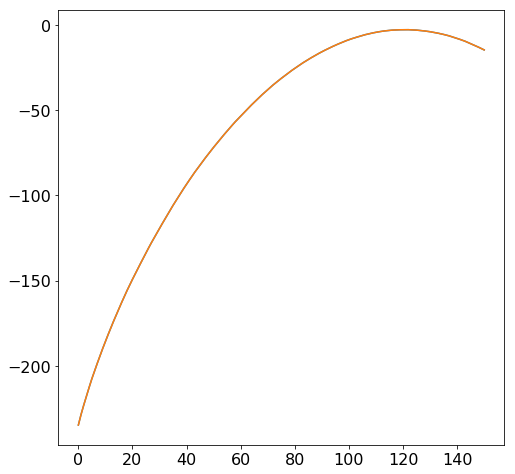

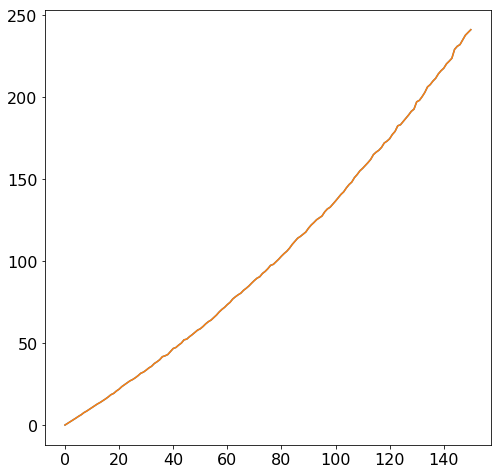

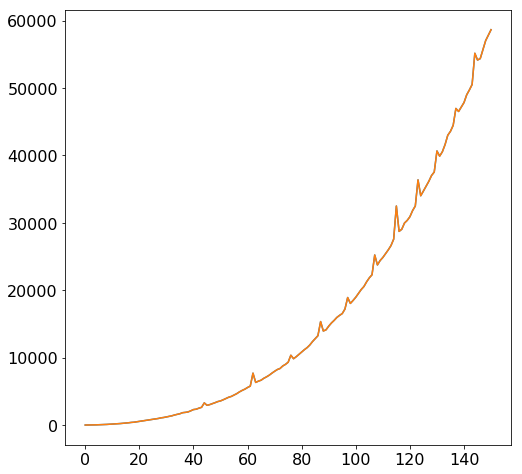

In [8]:
fig = plt.figure(figsize=(8,8))
plt.plot(N,lnPi)
plt.plot(N1, lnPi1)
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(N,energy)
plt.plot(N1, energy1)
plt.show()

fig = plt.figure(figsize=(8,8))
plt.plot(N,energy2)
plt.plot(N1, energy21)
plt.show()